Nice color picker to generate color schemes: https://coolors.co

In [26]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display,SVG
from matplotlib.ticker import MaxNLocator
from scipy.stats import entropy
import glob
import MESS
import numpy as np
import pandas as pd
import seaborn as sns
import collections

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure2-sims/lambda_0.75/"
sp_dict = {"no":0, "lo":0.0025, "hi":0.005}

#analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure2-sims/lambda_0.5/"
#sp_dict = {"no":0, "lo":0.0005, "hi":0.005}

# Lower environmental strength means it doesn't work as good
#analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure2-sims/generations_100/"
#sp_dict = {"no":0, "lo":0.00005, "hi":0.0001}

models = ["neutral", "competition", "filtering"]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


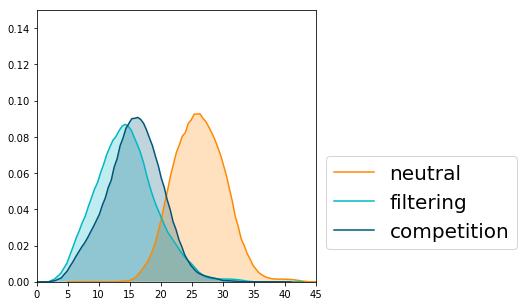

In [30]:
def plot_abundance(ax='', figsize=(5, 5), speciation_prob="no"):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)

    for m in models:
        simdir = analysis_dir + "{}_MESS/".format(m)

        logs = glob.glob("{}/{}-*/*megalog.txt".format(simdir, speciation_prob))

        log_dat = [pd.read_csv(x)["abundance"].sort_values(ascending=False).values for x in logs]

        log_df = pd.concat(map(pd.Series, log_dat), axis=1)
#        mask = (log_df.notna().sum() >= 15) & (log_df.notna().sum() <= 16)
        mask = (log_df.notna().sum() >= 5) & (log_df.notna().sum() <= 50)
        log_df = log_df.loc[:, mask]

        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        xs = range(0, len(means))
        ax.plot(xs, np.log(means), c=MESS.plotting.model_colors[m])
        ax.plot(xs, np.log(means + stds), c=MESS.plotting.model_colors[m], ls='--')
        ax.plot(xs, np.log(np.clip(means - stds, 1, a_max=None)), color=MESS.plotting.model_colors[m], ls='--')
        ax.fill_between(xs, np.log(np.clip(means - stds, 1, a_max=None)), np.log(means + stds),
                        color=MESS.plotting.model_colors[m], alpha=0.25)
        ax.set_xlim(0, 35)

def plot_pi(ax='', figsize=(5, 5), speciation_prob="no"):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)

    for m in models:
        simdir = analysis_dir + "{}_MESS/".format(m)

        logs = glob.glob("{}/{}-*/*megalog.txt".format(simdir, speciation_prob))

        log_dat = [pd.read_csv(x)["pi_local"].sort_values(ascending=False).values for x in logs]

        log_df = pd.concat(map(pd.Series, log_dat), axis=1)
#        mask = (log_df.notna().sum() >= 15) & (log_df.notna().sum() <= 16)
        mask = (log_df.notna().sum() >= 5) & (log_df.notna().sum() <= 50)
        log_df = log_df.loc[:, mask]

        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        xs = range(0, len(means))
        ax.plot(xs, means, c=MESS.plotting.model_colors[m])
        ax.plot(xs, means + stds, c=MESS.plotting.model_colors[m], ls='--')
        ax.plot(xs, means - stds, color=MESS.plotting.model_colors[m], ls='--')
        ax.fill_between(xs, means - stds, means + stds,
                        color=MESS.plotting.model_colors[m], alpha=0.25)
        ax.set_xlim(0, 15)
        ax.set_ylim(0, 0.005)


def plot_richness(ax='', figsize=(5, 5), simfile=analysis_dir + "SIMOUT.txt",\
                     k="epa", speciation_prob="no", xlim=(0,45), legend=False):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)

    labels, sim_df = MESS.plotting._filter_sims(simfile,\
                            feature_set=["S", "speciation_prob"],\
                            normalize_hills=False)

    mask = (sim_df["S"] > 5) & (sim_df["speciation_prob"] == sp_dict[speciation_prob])
    sim_df = sim_df[mask]
    labels = labels[mask]

    neut_df = sim_df[labels.values == "neutral"]
    filt_df = sim_df[labels.values == "filtering"]
    comp_df = sim_df[labels.values == "competition"]
    
    bw_method=4
    ax = sns.kdeplot(neut_df["S"], ax=ax, shade=True, color=MESS.plotting.model_colors["neutral"],
                    label="neutral", bw=bw_method, kernel=k, legend=legend)
    ax.set_xlim(xlim)
    ax = sns.kdeplot(filt_df["S"], ax=ax, shade=True, color=MESS.plotting.model_colors["filtering"],
                    label="filtering", bw=bw_method, kernel=k, legend=legend)
    ax.set_xlim(xlim)
    ax = sns.kdeplot(comp_df["S"], ax=ax, shade=True, color=MESS.plotting.model_colors["competition"],
                    label="competition", bw=bw_method, kernel=k, legend=legend)
    ax.set_xlim(xlim)
    ax.set_ylim(0, 0.15)

    ## If you have a legend, increase the font size
    try:
#        plt.legend(fontsize='20', loc='upper left')
        plt.setp(ax.get_legend().get_texts(), fontsize='15') 
    except:
        pass
#plot_abundance()
#plot_pi(speciation_prob="hi")
sim_df = plot_richness(speciation_prob="lo", legend=False)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=20)

In [29]:
labels, sim_df = MESS.plotting._filter_sims(analysis_dir + "SIMOUT.txt",\
                            feature_set=["S", "speciation_prob"],\
                            normalize_hills=False)
len(labels)
#np.sum(sim_df["speciation_prob"] == 0)
#print(analysis_dir)

2251

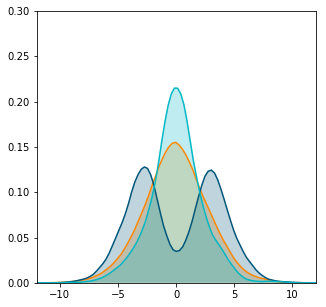

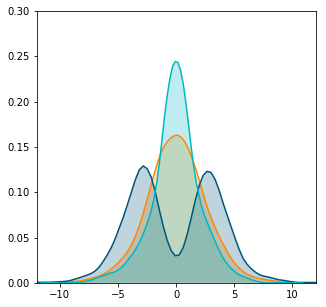

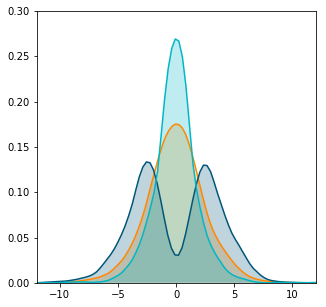

In [11]:

def plot_traits(ax='', speciation_prob='hi'):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    for m in models:
        simdir = analysis_dir + "{}_MESS".format(m)

        logs = glob.glob("{}/{}-*/*megalog*".format(simdir, speciation_prob))
        log_dat = [pd.read_csv(x).sort_values(by=["abundance"], ascending=False) for x in logs]
        log_df = pd.concat(map(pd.Series, [x["trait"].values for x in log_dat]), axis=1)

        minspecies = 5
        maxspecies = 50
        mask = (log_df.notna().sum() >= minspecies) & (log_df.notna().sum() <= maxspecies)
        log_df = log_df.loc[:, mask]


        diff_df = log_df - log_df.mean()

        try:
            sns.kdeplot(diff_df.dropna().values.flatten(), ax=ax,
                        shade=True, color=MESS.plotting.model_colors[m],
                        label=m, bw=1.5, kernel="epa", legend=False)
        except Exception as inst:
            print(log_df)
            pass
    ax.set_ylim(0, 0.30)
    ax.set_xlim(-12, 12)
plot_traits(speciation_prob="no")
plot_traits(speciation_prob="lo")
plot_traits(speciation_prob="hi")

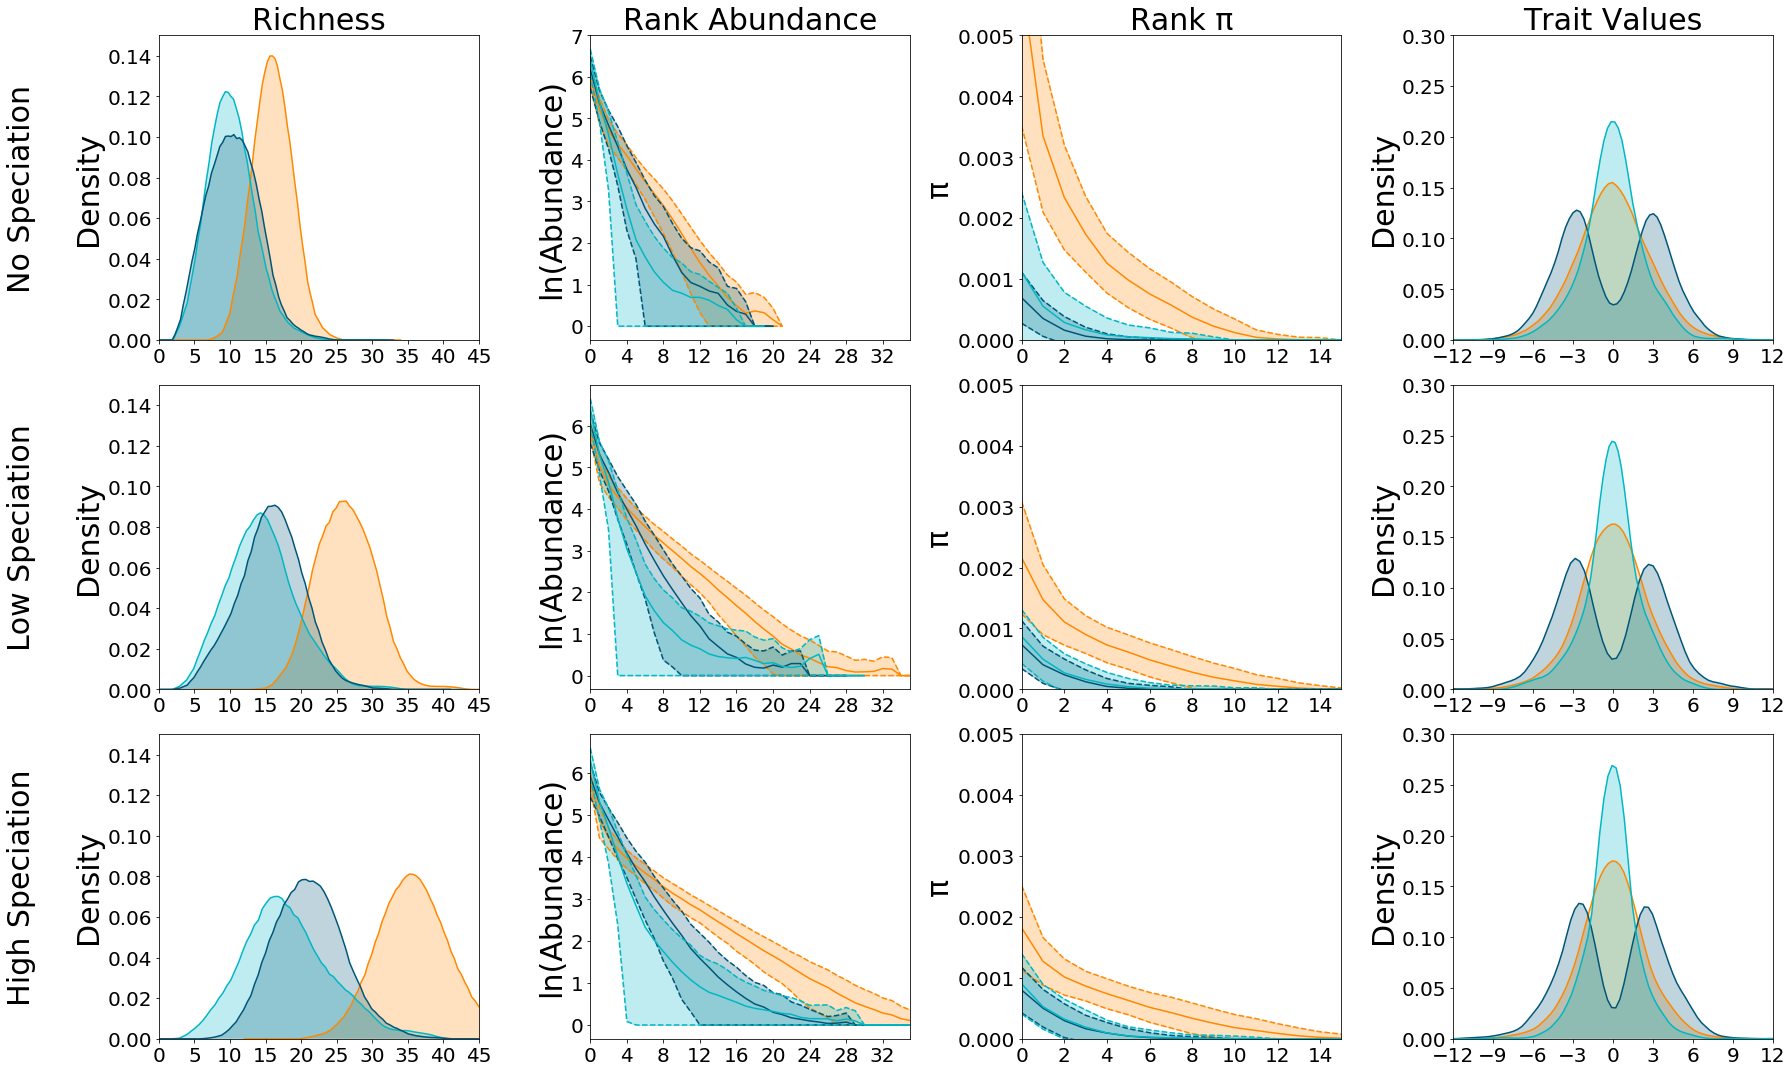

In [31]:
funcs = {"Richness":plot_richness,
         "Rank Abundance":plot_abundance,
         u"Rank π":plot_pi,
         "Trait Values":plot_traits}
sp_title_dict = {"no":"No", "lo":"Low", "hi":"High"}

fig, axs = plt.subplots(3, 4, figsize=(25, 15))
for i, sp in enumerate(["no", "lo", "hi"]):
    for j, f in enumerate(["Richness", "Rank Abundance", u"Rank π", "Trait Values"]):
        #if i == 0 and j == 0:
        #        funcs[f](ax=axs[i][j], speciation_prob=sp, legend=True)
        funcs[f](ax=axs[i][j], speciation_prob=sp)

        ## Labeling and cleaning up the plots
        if i % 4 == 0:
            axs[i][j].set_title(f, fontsize=30)
        if j % 4 == 0:
            axs[i][j].set_ylabel("{} Speciation\n\nDensity".format(sp_title_dict[sp]), fontsize=30)
        if j % 4 == 1:
            axs[i][j].set_ylabel("ln(Abundance)", fontsize=30)
        if j % 4 == 2:
            axs[i][j].set_ylabel(u"π", fontsize=30)
        if j % 4 == 3:
            axs[i][j].set_ylabel("Density", fontsize=30)
        ## Cast xtick labelsto int
        axs[i][j].xaxis.set_major_locator(MaxNLocator(integer=True))
        
## Make axis ticklabels easier to read
axs = axs.flatten()
_ = [plt.setp(ax.get_xticklabels(), fontsize=20) for ax in axs.flatten()]
_ = [plt.setp(ax.get_yticklabels(), fontsize=20) for ax in axs.flatten()]

plt.tight_layout()

/home/isaac/Continuosity/MESS/analysis/figure2-sims/generations_100/filtering_MESS/no-figure2-740021796/island1-0.2156-megalog.txt


,name,trait,abundance,Ne_local,Ne_meta,tdiv,growth_rate,migration_rate,segsites_tot,pi_tot,segsites_local,segsites_meta,pi_local,pi_meta,dxy,da,TajimaD
0,t59,-0.856736,2,2.666667e+03,20376,2662,0,0.000000e+00,4,0.001413,0,4,0.000000,0.001676,0.001930,0.001092,0.000000
1,t9,-5.607434,4,3.200000e+03,32317,3406,0,9.174985e-08,1,0.000471,0,1,0.000000,0.000819,0.000526,0.000117,0.000000
2,t67,-1.215725,17,1.123477e+04,72406,142283,0,4.253945e-08,37,0.025088,3,31,0.001326,0.012982,0.041228,0.034074,-0.911619
3,t44,-4.464337,1,2.000000e+03,11805,2079,0,0.000000e+00,2,0.001173,0,2,0.000000,0.001442,0.001579,0.000858,0.000000
4,t14,-0.051744,2449,4.937663e+06,161169,625000,0,2.112740e-10,100,0.026103,79,12,0.029630,0.005341,0.033860,0.016374,-1.782421
5,t21,-3.886592,3,3.913043e+03,46226,20650,0,8.662900e-08,5,0.003536,1,4,0.000351,0.003275,0.005088,0.003275,-1.024317
6,t16,-2.505848,3,3.000000e+03,17680,1361,0,2.449180e-07,2,0.000351,0,2,0.000000,0.000702,0.000351,0.000000,0.000000
7,t74,1.653289,5,3.333333e+03,98307,10475,0,1.431981e-07,13,0.005928,2,11,0.001559,0.007875,0.007018,0.002300,0.940321
8,t94,-6.209826,12,7.565789e+03,13466,39712,0,2.329818e-08,2,0.001062,1,1,0.000624,0.000351,0.001579,0.001092,0.102408
9,t22,0.627895,1,6.131169e+03,9133,93831,0,1.216770e-08,10,0.005614,3,3,0.001793,0.001637,0.009123,0.007407,-0.006885


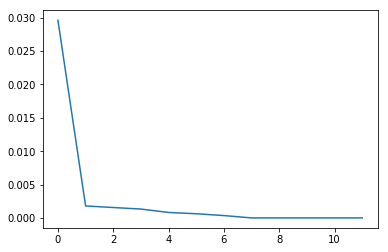

In [27]:
simdir = analysis_dir + "filtering_MESS"
logs = glob.glob("{}/no-*/*megalog*".format(simdir))
print(logs[-1])
df = pd.read_csv(logs[-1])
pis = df["pi_local"]
xs = range(0, len(pis))
ys = sorted(pis, reverse=True)
plt.plot(xs, ys)
df

Removed invariant targets. Retained: ['S']
Nsims
  neutral	240
  filtering	240
  competition	160


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aab4d0bac90>],
      dtype=object)

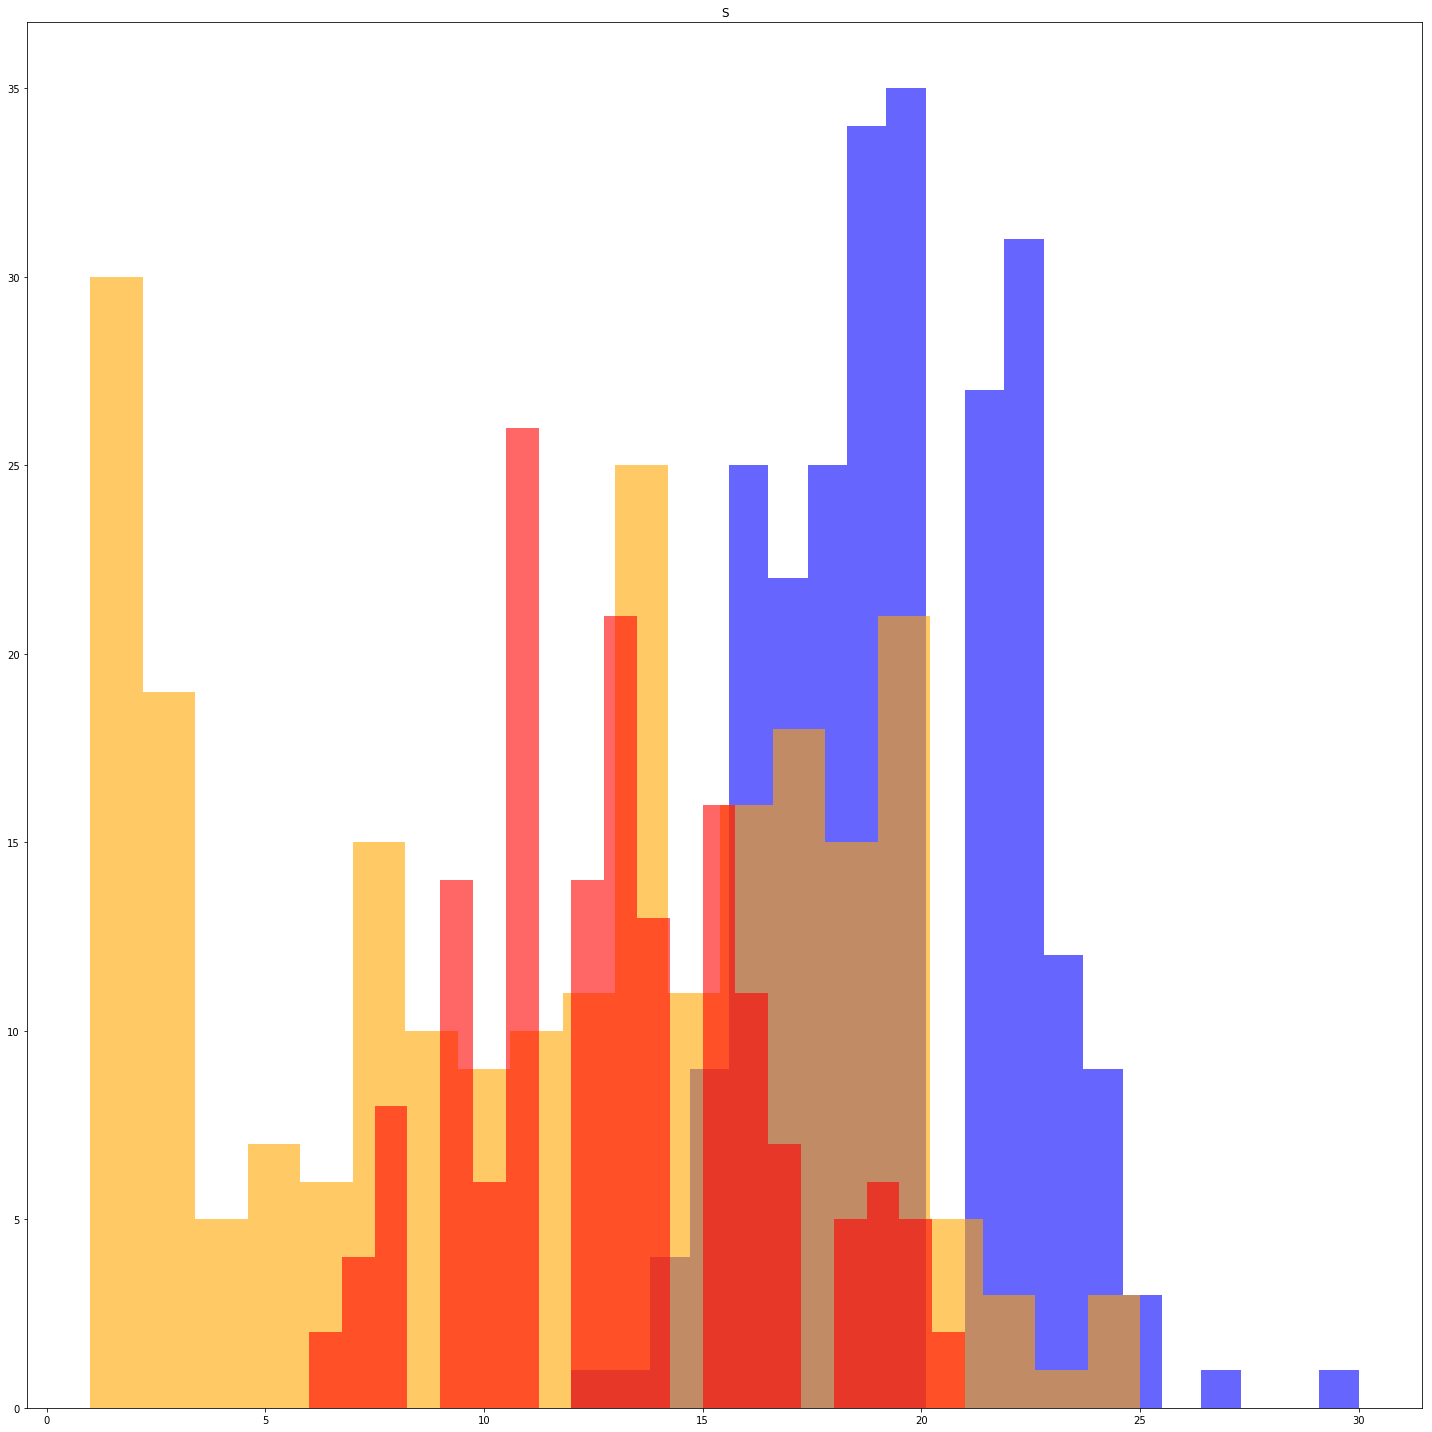

In [441]:
simfile = analysis_dir + "SIMOUT.txt"
#simfile = analysis_dir + "SIMOUT.txt"
sim_df = pd.read_csv(simfile, sep="\t", header=0)
MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=False,\
                                        feature_set=["S"])

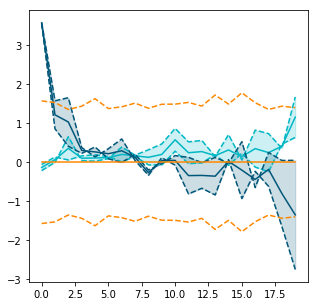

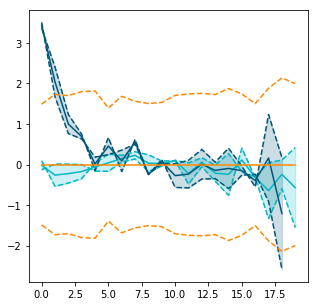

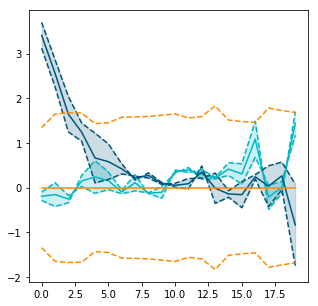

In [19]:
def plot_traits_residuals(ax='', sp_prob='hi'):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    mean_dict = {}
    std_dict = {}
    for m in models:
        simdir = analysis_dir + "{}_MESS".format(m)

        logs = glob.glob("{}/{}-*/*megalog*".format(simdir, sp_prob))
        log_dat = [pd.read_csv(x).sort_values(by=["abundance"], ascending=False) for x in logs]
        log_df = pd.concat(map(pd.Series, [x["trait"].values for x in log_dat]), axis=1)
        abunds = pd.concat(map(pd.Series, [x["abundance"].values for x in log_dat]), axis=1)
        #display(log_df)
        minspecies = 8
        maxspecies = 20
        mask = (log_df.notna().sum() >= minspecies) & (log_df.notna().sum() <= maxspecies)
        log_df = log_df.loc[:, mask]
        mask = (abunds.notna().sum() >= minspecies) & (abunds.notna().sum() <= maxspecies)
        abunds = abunds.loc[:, mask]

        col_means = log_df.mean()
        col_means_vec = col_means.values.reshape((1, col_means.shape[0]))
        log_df = pd.DataFrame(np.abs(log_df.values - col_means_vec))

        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        mean_dict[m] = means[:24]
        std_dict[m] = stds[:24]

    for m in ["filtering", "competition"]:
        xs = range(0, len(mean_dict["neutral"]))
        means = (mean_dict[m] - mean_dict["neutral"])
        stds = (std_dict[m] - std_dict["neutral"])
        ax.plot(xs, means, c=MESS.plotting.model_colors[m])
        if True:
            ax.plot(xs, means + stds, c=MESS.plotting.model_colors[m], ls='--')
            ax.plot(xs, means - stds, c=MESS.plotting.model_colors[m], ls='--')
            ax.fill_between(xs, means - stds, means + stds, alpha=0.2, color=MESS.plotting.model_colors[m])
    xs = range(0, 20)
    ax.plot(xs, [0]*len(xs), color=MESS.plotting.model_colors["neutral"])
    ax.plot(xs, 0 + std_dict["neutral"][:20], c=MESS.plotting.model_colors["neutral"], ls='--')
    ax.plot(xs, 0 - std_dict["neutral"][:20], c=MESS.plotting.model_colors["neutral"], ls='--')

plot_traits_residuals(sp_prob="no")
plot_traits_residuals(sp_prob="lo")
plot_traits_residuals(sp_prob="hi")

In [30]:
simdir = analysis_dir + "{}_MESS".format("filtering")

logs = glob.glob("{}/{}-*/*megalog*".format(simdir, "hi"))
log_dat = [pd.read_csv(x).sort_values(by=["abundance"], ascending=False) for x in logs]
log_df = pd.concat(map(pd.Series, [x["trait"].values for x in log_dat]), axis=1)
abunds = pd.concat(map(pd.Series, [x["abundance"].values for x in log_dat]), axis=1)

mn = log_df[0].mean()
print(mn)
#np.abs(log_df[0] - mn) * abunds.iloc[:, 0]
log_dat[1]

-2.3267701677660693


,name,trait,abundance,Ne_local,Ne_meta,tdiv,growth_rate,migration_rate,segsites_tot,pi_tot,segsites_local,segsites_meta,pi_local,pi_meta,dxy,da,TajimaD
4,t18,-4.706123,2269,18240.230656,56880,177512,0,1.976614e-08,19,0.007230,7,9,0.004483,0.004600,0.009649,0.005107,0.283530
7,t16,-2.031607,73,8671.930803,161169,48171,0,1.532070e-07,22,0.004922,0,21,0.000000,0.007914,0.005789,0.001832,0.000000
13,t30,-4.092946,52,12966.295470,5572,286228,0,2.425015e-09,14,0.007258,6,2,0.002651,0.000702,0.012281,0.010604,-1.048221
1,t49,2.350804,33,6777.920411,98307,35163,0,1.132873e-07,17,0.010397,3,8,0.002807,0.005224,0.016140,0.012125,1.953372
9,t45,1.415134,20,5581.395349,7115,55695,0,9.650777e-09,5,0.003250,2,2,0.001949,0.001637,0.004561,0.002768,1.954422
8,t17,-0.872308,12,5023.255814,17680,24256,0,5.745047e-08,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
14,t77,-3.519546,12,4396.946565,23600,77719,0,3.511582e-08,6,0.003647,0,5,0.000000,0.004094,0.005088,0.003041,0.000000
5,t55,2.320272,5,3333.333333,6293,11027,0,0.000000e+00,1,0.000693,1,0,0.000975,0.000000,0.000877,0.000390,1.551054
6,t56,-0.313302,5,3333.333333,72406,9718,0,1.852233e-07,9,0.003019,0,9,0.000000,0.005341,0.003333,0.000663,0.000000
10,t13,0.398912,5,4528.301887,38371,22999,0,3.840747e-08,6,0.004026,0,6,0.000000,0.002963,0.006316,0.004834,0.000000


NameError: name 'df_dict' is not defined

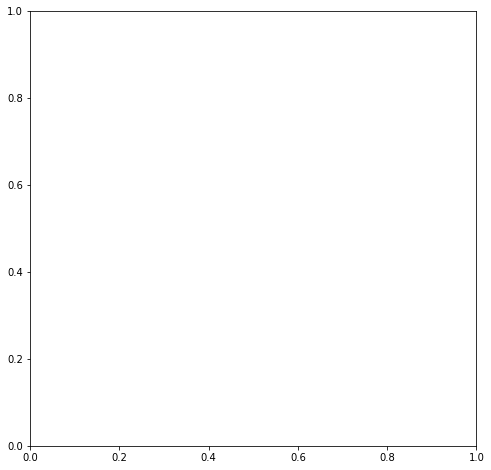

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
traits = True

for m in models:
    df_dict[m] = pd.DataFrame()
    simdir = analysis_dir + "{}_MESS/".format(m)

    for sp in ["lo"]:
        logs = glob.glob("{}/{}-*/*megalog.txt".format(simdir, sp))
        log_dat = [pd.read_csv(x)["trait"].sort_values(ascending=False).values for x in logs]
        
        log_df = pd.concat(map(pd.Series, log_dat), axis=1)
        mask = log_df.notna().sum() == 17
        log_df = log_df.loc[:, mask]

        if traits:
            col_means = log_df.mean()
            col_means_vec = col_means.values.reshape((1, col_means.shape[0]))
            log_df = pd.DataFrame(abs(log_df.values - col_means_vec))

        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        xs = range(0, len(means))

        ax.plot(xs, means, c=MESS.plotting.model_colors[m])
        ax.plot(xs, means + stds, c=MESS.plotting.model_colors[m], ls='--')
        ax.plot(xs, means - stds, c=MESS.plotting.model_colors[m], ls='--')
        ax.fill_between(xs, means - stds, means + stds, color=MESS.plotting.model_colors[m],alpha=0.5)


In [396]:
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

,S
0,21.0
1,11.0
2,19.0
3,14.0
4,13.0
5,9.0
6,9.0
7,20.0
8,12.0
9,11.0


## Trash below here

Figure 2 Dev

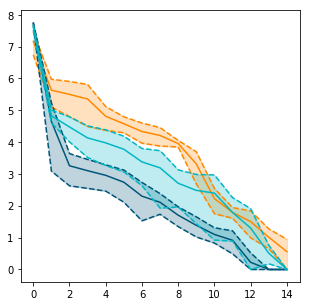

In [619]:
df_dict = {}
fig, ax = plt.subplots(figsize=(5, 5))
traits = False

for m in models:
    df_dict[m] = pd.DataFrame()
    simdir = analysis_dir + "{}_MESS/".format(m)

    for sp in ["no"]:
        logs = glob.glob("{}/{}-*/*megalog.txt".format(simdir, sp))[:50]

        log_dat = [pd.read_csv(x)["abundance"].sort_values(ascending=False).values for x in logs]
        
        log_df = pd.concat(map(pd.Series, log_dat), axis=1)
        mask = log_df.notna().sum() == 15
        log_df = log_df.loc[:, mask]

        if traits:
            col_means = log_df.mean()
            col_means_vec = col_means.values.reshape((1, col_means.shape[0]))
            log_df = pd.DataFrame(log_df.values - col_means_vec)

        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        xs = range(0, len(means))
        if True:
            ax.plot(xs, np.log(means), c=MESS.plotting.model_colors[m])
            ax.plot(xs, np.log(means + stds), c=MESS.plotting.model_colors[m], ls='--')
            ax.plot(xs, np.log(np.clip(means - stds, 1, a_max=None)), color=MESS.plotting.model_colors[m], ls='--')
            ax.fill_between(xs, np.log(np.clip(means - stds, 1, a_max=None)), np.log(means + stds),
                            color=MESS.plotting.model_colors[m], alpha=0.25)
        else:
            ax.plot(xs, means, c=MESS.plotting.model_colors[m])
            ax.plot(xs, means + stds, c=MESS.plotting.model_colors[m], ls='--')
            ax.plot(xs, means - stds, color=MESS.plotting.model_colors[m], ls='--')
            ax.fill_between(xs, means - stds, means + stds,
                            color=MESS.plotting.model_colors[m], alpha=0.25)


The RAC version is unparsable.

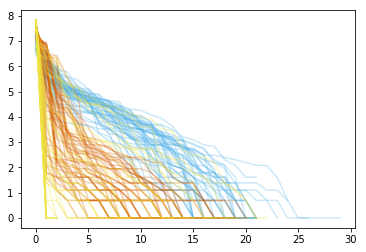

In [562]:
models = ["neutral", "competition", "filtering"]
df_dict = {}
for m in models:
    df_dict[m] = pd.DataFrame()
    simdir = analysis_dir + "{}_MESS/".format(m)
    for sp in ["hi"]:
        dirs = glob.glob("{}/{}-*".format(simdir, sp))[:50]
        for d in dirs:
            try:
                df = pd.read_csv(glob.glob("{}/*megalog*".format(d))[0])
            except:
                pass
            pis = df["abundance"]
            xs = range(0, len(pis))
            ys = np.log(sorted(pis, reverse=True))
            #ys = sorted(pis, reverse=True)
            plt.plot(xs, ys, c=MESS.plotting.model_colors[m], alpha=0.3)
            #plt.xlim(0, 15)

In [76]:
import pandas as pd
from rpy2.robjects import r, pandas2ri
pd.__version__

ModuleNotFoundError: No module named 'rpy2'

## This is the old bad version. Bad Bad!

In [95]:
def plot_traits(ax='', speciation_prob='hi', do_abs=True):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    for m in models:
        simdir = analysis_dir + "{}_MESS".format(m)

        logs = glob.glob("{}/{}-*/*megalog*".format(simdir, speciation_prob))
        log_dat = [pd.read_csv(x).sort_values(by=["abundance"], ascending=False) for x in logs]
        log_df = pd.concat(map(pd.Series, [x["trait"].values for x in log_dat]), axis=1)
        abunds = pd.concat(map(pd.Series, [x["abundance"].values for x in log_dat]), axis=1)
        #display(log_df)
        minspecies = 10
        maxspecies = 21
        mask = (log_df.notna().sum() >= minspecies) & (log_df.notna().sum() <= maxspecies)
        log_df = log_df.loc[:, mask]
        mask = (abunds.notna().sum() >= minspecies) & (abunds.notna().sum() <= maxspecies)
        abunds = abunds.loc[:, mask]

        col_means = log_df.mean()
        col_means_vec = col_means.values.reshape((1, col_means.shape[0]))
        if do_abs:
            log_df = pd.DataFrame(np.abs(log_df.values - col_means_vec))
        else:
            log_df = pd.DataFrame(log_df.values - col_means_vec)
        
        means = log_df.apply(np.mean, axis=1)
        stds = log_df.apply(np.std, axis=1)
        xs = range(0, len(means))
        ax.plot(xs, means, c=MESS.plotting.model_colors[m])
        ax.plot(xs, means + stds, c=MESS.plotting.model_colors[m], ls='--')
        ax.plot(xs, means - stds, c=MESS.plotting.model_colors[m], ls='--')
        ax.fill_between(xs, means - stds, means + stds, alpha=0.2, color=MESS.plotting.model_colors[m])

        ## Plot the average RAD
        #ax.plot(xs, np.log(abunds.apply(np.mean, axis=1)), c=MESS.plotting.model_colors[m])
        #ax.set_title(sp_prob, fontsize=20)
#plot_traits(speciation_prob="no", do_abs=False)
plot_traits(speciation_prob="no", do_abs=False)
plot_traits(speciation_prob="lo", do_abs=True)
plot_traits(speciation_prob="hi", do_abs=True)


array([0.06832603, 0.10672431, 0.10865846, 0.        , 0.15469331,
       0.67323002, 0.64732678, 0.12902935,        nan, 0.62449454,
       0.67443842, 0.66572982, 0.25550481,        nan, 0.87560056,
       0.77233425, 1.05257455, 1.18578908,        nan, 2.02650274,
       0.78191959, 1.37794474, 1.809256  ,        nan, 2.42098973,
       0.8358888 , 1.52575805, 2.03501413,        nan, 2.7699918 ,
       1.11606037, 1.86706334, 2.97932548,        nan, 2.92790126,
       1.36715176, 2.26533581, 3.95717343,        nan, 3.04884566,
       1.46121104, 2.39416594,        nan,        nan, 3.15545772,
       1.51527293, 2.54051319,        nan,        nan, 3.7191844 ,
       1.57048702, 3.11391367,        nan,        nan, 3.79511436,
       1.74388004, 3.29930396,        nan,        nan, 4.02302456,
       1.98455895, 3.32983631,        nan,        nan, 4.26010798,
       2.37402203, 3.72709066,        nan,        nan, 5.2303823 ,
       2.41024469, 3.99358089,        nan,        nan, 5.24014

In [85]:
!hostname

goatzilla
